In [1]:
%reload_ext autoreload
%autoreload 2

In [2]:
from src.cifar_autoencoder import CifarDataSet, AutoEncoder, train
from src.cifar_graph_classifier import Net
from torch.utils.data import DataLoader

In [3]:
train_ds = CifarDataSet(
            batch_dir_path="/home/pranjal/pytorch/Datasets/cifar-10-batches-py/", mode="train"
        )
test_ds = CifarDataSet(
    batch_dir_path="/home/pranjal/pytorch/Datasets/cifar-10-batches-py/", mode="test"
)
sample_ds = CifarDataSet(
    batch_dir_path="/home/pranjal/pytorch/Datasets/cifar-10-batches-py/", mode="sample"
)

In [4]:
m = AutoEncoder()

In [5]:
tl = DataLoader(test_ds,batch_size=64)

In [7]:
ops = train(m, tl, 10)

In [ ]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
all_losses = []
index = 0
for i,x in ops[-1]:
    all_losses.append({"counter":index,"epoch":i+1,"iteration":index+1,"loss":x})
    index+=1

In [ ]:
loss_df = pd.DataFrame(all_losses)

In [ ]:
plt.figure(figsize=(15,10))
sns.lineplot(data=loss_df,x="counter",y="loss",hue="epoch",palette=sns.color_palette("bright",n_colors=len(loss_df.epoch.unique())))

In [ ]:
imgs = ops[0][-1][1].reshape(-1,3,32,32).numpy()

In [ ]:
imgs = imgs.transpose(0,2,3,1)

In [ ]:
pred = ops[0][-1][2].reshape(-1,3,32,32).detach().numpy()

In [ ]:
pred = pred.transpose(0,2,3,1)

In [ ]:
index = 2

In [ ]:
plt.imshow(imgs[index])

In [ ]:
plt.imshow(pred[index])

In [ ]:
n = Net(num_classes=10,
        encoder_model=m,
        sample_dataset=sample_ds,
        train_dataset=train_ds,
        num_epochs=20,
        learning_rate=1e-3,
        seed=42,
        use_graph=True)

In [ ]:
n.sanity_test()

In [ ]:
loss = n.train()

In [ ]:
all_losses = []
index = 0
for i,x in enumerate(loss):
    for j,y in enumerate(x):
        all_losses.append({"counter":index,"epoch":i+1,"iteration":j+1,"loss":y})
        index+=1

In [ ]:
loss_df = pd.DataFrame(all_losses)

# w/o graph

<AxesSubplot:xlabel='counter', ylabel='loss'>

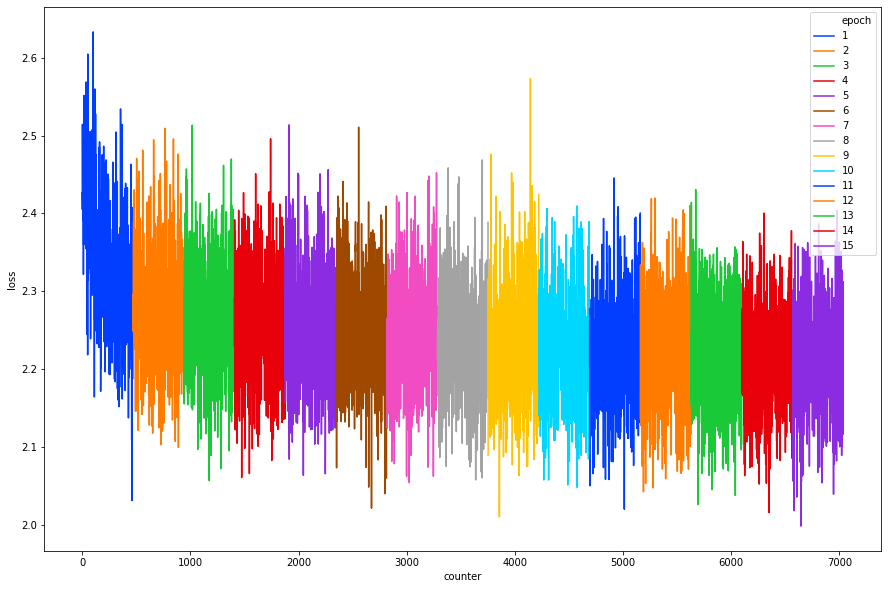

In [28]:
plt.figure(figsize=(15,10))
sns.lineplot(data=loss_df,x="counter",y="loss",hue="epoch",palette=sns.color_palette("bright",n_colors=len(loss_df.epoch.unique())))

# w graph

In [ ]:
plt.figure(figsize=(15,10))
sns.lineplot(data=loss_df,x="counter",y="loss",hue="epoch",palette=sns.color_palette("bright",n_colors=len(loss_df.epoch.unique())))

In [ ]:
clf_test_loader = n.get_encoding(sample_ds, 64)

In [ ]:
from tqdm import tqdm
import torch

In [ ]:
res = []
for data in tqdm(clf_test_loader):
    img, label = data
    recon = n.forward(img,is_train=False)
    _, preds = torch.max(recon, 1)
    bool_tensor = preds == label
    res.append(torch.stack([label,bool_tensor,preds],dim=1))

In [ ]:
all_res = torch.cat(res,dim=0)

In [ ]:
import numpy as np

In [ ]:
df_test_res = pd.DataFrame(all_res.numpy(),columns=["class","res","pred_class"])

# w graph

In [ ]:
df_test_res.groupby("res").count()/df_test_res.shape[0]

In [ ]:
confusion_matrix = pd.crosstab(df_test_res['class'], df_test_res['pred_class'], rownames=['Actual'], colnames=['Predicted'])
confusion_matrix